In [1]:
import pandas as pd
import duckdb

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score,classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

In [2]:
df_main = pd.read_parquet("farminghouseholds.parquet", engine="pyarrow")

In [3]:
filepath = "rainfall_states.csv"
df_rainfall = pd.read_csv(filepath)

In [4]:
filepath = "state_codes.csv"
df_states = pd.read_csv(filepath)

In [5]:
df_main.head().T

,0,1,2,3,4
HHID,0151062,0384700,0433113,0996908,0029719
state_code,31.0,31.0,31.0,31.0,31.0
lga_code,639.0,NaN,641.0,NaN,641.0
ea_code,0051900,0015405,0042302,0228400,0012102
zone_id,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...
non_agri_estab_kind__4,0.0,0.0,NaN,0.0,0.0
non_agri_estab_kind__5,0.0,0.0,NaN,0.0,0.0
non_agri_estab_kind__6,0.0,0.0,NaN,0.0,0.0
non_agri_estab_kind__999,0.0,0.0,NaN,0.0,0.0


In [6]:
df_states.head()

,state_code,statename
0,1,SOKOTO
1,2,ZAMFARA
2,3,KATSINA
3,4,JIGAWA
4,5,YOBE


In [7]:
df_rainfall.head()

,states,annual_rainfall
0,bayelsa,2625
1,cross river,2599
2,akwa ibom,2487
3,abia,2439
4,imo,2345


In [8]:
df_merge = pd.merge(df_main, df_states, on="state_code")

In [9]:
df_merge.head()

,HHID,state_code,lga_code,ea_code,zone_id,sector,hh_sex,hh_age,hh_school_attd,hh_edu_level,...,non_agri_estab,non_agri_estab_kind__1,non_agri_estab_kind__2,non_agri_estab_kind__3,non_agri_estab_kind__4,non_agri_estab_kind__5,non_agri_estab_kind__6,non_agri_estab_kind__999,nasc_listing_weight,statename
0,0151062,31.0,639.0,0051900,4.0,1.0,2.0,1.0,1.0,6.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.647110,ABIA
1,0384700,31.0,NaN,0015405,4.0,1.0,2.0,1.0,1.0,6.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.497777,ABIA
2,0433113,31.0,641.0,0042302,4.0,1.0,2.0,1.0,1.0,6.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.887394,ABIA
3,0996908,31.0,NaN,0228400,4.0,1.0,1.0,1.0,1.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,111.634028,ABIA
4,0029719,31.0,641.0,0012102,4.0,1.0,1.0,1.0,1.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.248846,ABIA


In [10]:
df_merge['statename'] = df_merge['statename'].str.lower()

In [11]:
df_merge.head()

,HHID,state_code,lga_code,ea_code,zone_id,sector,hh_sex,hh_age,hh_school_attd,hh_edu_level,...,non_agri_estab,non_agri_estab_kind__1,non_agri_estab_kind__2,non_agri_estab_kind__3,non_agri_estab_kind__4,non_agri_estab_kind__5,non_agri_estab_kind__6,non_agri_estab_kind__999,nasc_listing_weight,statename
0,0151062,31.0,639.0,0051900,4.0,1.0,2.0,1.0,1.0,6.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.647110,abia
1,0384700,31.0,NaN,0015405,4.0,1.0,2.0,1.0,1.0,6.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.497777,abia
2,0433113,31.0,641.0,0042302,4.0,1.0,2.0,1.0,1.0,6.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.887394,abia
3,0996908,31.0,NaN,0228400,4.0,1.0,1.0,1.0,1.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,111.634028,abia
4,0029719,31.0,641.0,0012102,4.0,1.0,1.0,1.0,1.0,5.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,160.248846,abia


In [12]:
df = pd.merge(df_merge, df_rainfall, left_on='statename', right_on='states')

In [13]:
df['hh_age'].unique()

array([1.])

In [14]:
df.hh_age.unique()

array([1.])

In [15]:
df.isnull().sum()

HHID                            0
state_code                      0
lga_code                     2084
ea_code                         0
zone_id                         0
                            ...  
non_agri_estab_kind__999    18773
nasc_listing_weight             0
statename                       0
states                          0
annual_rainfall                 0
Length: 140, dtype: int64

In [16]:
print(df.columns)

Index(['HHID', 'state_code', 'lga_code', 'ea_code', 'zone_id', 'sector',
       'hh_sex', 'hh_age', 'hh_school_attd', 'hh_edu_level',
       ...
       'non_agri_estab_kind__2', 'non_agri_estab_kind__3',
       'non_agri_estab_kind__4', 'non_agri_estab_kind__5',
       'non_agri_estab_kind__6', 'non_agri_estab_kind__999',
       'nasc_listing_weight', 'statename', 'states', 'annual_rainfall'],
      dtype='object', length=140)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Columns: 140 entries, HHID to annual_rainfall
dtypes: float64(132), int64(1), object(7)
memory usage: 29.6+ MB


In [18]:
pd.set_option('display.max_columns', None)

df.head(5)

,HHID,state_code,lga_code,ea_code,zone_id,sector,hh_sex,hh_age,hh_school_attd,hh_edu_level,hh_trg,hh_trg_type__1,hh_trg_type__2,hh_ag_activity__Crop,hh_ag_activity__Livestock,hh_ag_activity__Poultry,hh_ag_activity__Fisheries,hh_ag_activity__Forestry,hh_plots_number,hh_cereals__MAIZE,hh_cereals__RICE,hh_cereals__MILLET,hh_cereals__GUINEA_CORN,hh_cereals__ACHA,hh_cereals__WHEAT,hh_cereals__NONE,hh_tubers__CASSAVA,hh_tubers__YAM,hh_tubers__COCOYAM,hh_tubers__SWEET_POTATO,hh_tubers__IRISH_POTATO,hh_tubers__NONE,hh_legumes__BEANS_COWPEA,hh_legumes__BAMBARA_NUT,hh_legumes__PIGEON_PEAS,hh_legumes__NONE,hh_vegetables__ONION,hh_vegetables__OKRO,hh_vegetables__TOMATOES,hh_vegetables__CARROT,hh_vegetables__GARLIC,hh_vegetables__GREEN_LEAF,hh_vegetables__MELON,hh_vegetables__PUMPKIN,hh_vegetables__LETTUCE,hh_vegetables__GARDEN_EGGS,hh_vegetables__CUCUMBER,hh_vegetables__CABBAGE,hh_vegetables__BELL_PEPPER,hh_vegetables__NONE,hh_oil_seeds__GNUTS,hh_oil_seeds__SUGAR_CANE,hh_oil_seeds__TOBACCO,hh_oil_seeds__COTTON,hh_oil_seeds__OIL_PALM,hh_oil_seeds__JUTE,hh_oil_seeds__SESAME,hh_oil_seeds__SOYA_BEANS,hh_oil_seeds__COCONUT,hh_oil_seeds__SHEA_NUT,hh_oil_seeds__OIL_BEAN,hh_oil_seeds__RUBBER,hh_oil_seeds__NONE,hh_fruits_nuts__ORANGES,hh_fruits_nuts__LEMON,hh_fruits_nuts__GRAPEFRUIT,hh_fruits_nuts__TANGERINE,hh_fruits_nuts__AVOCADO,hh_fruits_nuts__GUAVA,hh_fruits_nuts__BANANA,hh_fruits_nuts__MANGO,hh_fruits_nuts__PAWPAW,hh_fruits_nuts__PINEAPPLE,hh_fruits_nuts__PLANTAIN,hh_fruits_nuts__DATE_PALM,hh_fruits_nuts__PEAR,hh_fruits_nuts__CHERRY,hh_fruits_nuts__CASHEW,hh_fruits_nuts__WALNUT,hh_fruits_nuts__WATER_MELON,hh_fruits_nuts__NONE,hh_stimulant_crops__COCOA,hh_stimulant_crops__KOLANUT,hh_stimulant_crops__COFFEE,hh_stimulant_crops__TEA,hh_stimulant_crops__ALLIGATOR,hh_stimulant_crops__NONE,hh_other_crops__SMALL_PEPPER,hh_other_crops__CHILI_PEPPER,hh_other_crops__BITTER_KOLA,hh_other_crops__GINGER,hh_other_crops__LOCUST_BEANS,hh_other_crops__GUM_ARABIC,hh_other_crops__OTHERS,hh_other_crops__NONE,hh_livestock_list__CATTLE,hh_livestock_list__GOAT,hh_livestock_list__SHEEP,hh_livestock_list__PIG,hh_livestock_list__HORSE,hh_livestock_list__DONKEY,hh_livestock_list__CAMEL,hh_livestock_list__OTHER,hh_tot_number__CATTLE,hh_tot_number__GOAT,hh_tot_number__SHEEP,hh_tot_number__PIG,hh_tot_number__HORSE,hh_tot_number__DONKEY,hh_tot_number__CAMEL,hh_tot_number__OTHER_LIVE,hh_poultry_list__CHICKEN,hh_poultry_list__DUCK,hh_poultry_list__GUINEA_FOWL,hh_poultry_list__TURKEY,hh_poultry_list__OTHER,hh_tot_number__CHICKEN,hh_tot_number__DUCK,hh_tot_number__GUINEA_FOWL,hh_tot_number__TURKEY,hh_tot_number__OTHER_POUL,hh_fisheries_list__FISH_HUNTING,hh_fisheries_list__FISH_FARMING,hh_fisheries_list__OTHER,agri_estab,agri_estab_kind__1,agri_estab_kind__2,agri_estab_kind__3,non_agri_estab,non_agri_estab_kind__1,non_agri_estab_kind__2,non_agri_estab_kind__3,non_agri_estab_kind__4,non_agri_estab_kind__5,non_agri_estab_kind__6,non_agri_estab_kind__999,nasc_listing_weight,statename,states,annual_rainfall
0,0151062,31.0,639.0,0051900,4.0,1.0,2.0,1.0,1.0,6.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39.647110,abia,abia,2439
1,0384700,31.0,NaN,0015405,4.0,1.0,2.0,1.0,1.0,6.0,2.0,NaN,NaN,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,

In [19]:
df = df.drop(columns=[
    "agri_estab_kind__1",
    "agri_estab_kind__2",
    "agri_estab_kind__3",
    'non_agri_estab_kind__1',
    'non_agri_estab_kind__2',
    'non_agri_estab_kind__3',
    'non_agri_estab_kind__4',
    'non_agri_estab_kind__5',
    'non_agri_estab_kind__6',
    'non_agri_estab_kind__999',
    'nasc_listing_weight'
])

In [20]:
# Define groups of related column prefixes
cereal_cols = [col for col in df.columns if 'hh_cereals__' in col and '__NONE' not in col]
tuber_cols = [col for col in df.columns if 'hh_tubers__' in col and '__NONE' not in col]
legume_cols = [col for col in df.columns if 'hh_legumes__' in col and '__NONE' not in col]
vegetable_cols = [col for col in df.columns if 'hh_vegetables__' in col and '__NONE' not in col]
fruit_cols = [col for col in df.columns if 'hh_fruits_nuts__' in col and '__NONE' not in col]
oil_seed_cols = [col for col in df.columns if 'hh_oil_seeds__' in col and '__NONE' not in col]
stimulant_cols = [col for col in df.columns if 'hh_stimulant_crops__' in col and '__NONE' not in col]
other_crop_cols = [col for col in df.columns if 'hh_other_crops__' in col and '__NONE' not in col]
livestock_cols = [col for col in df.columns if 'hh_livestock_list__' in col]
poultry_cols = [col for col in df.columns if 'hh_poultry_list__' in col]
fisheries_cols = [col for col in df.columns if 'hh_fisheries_list__' in col]



In [21]:
def create_group_indicator_fast(df, cols, new_col_name):
    df[new_col_name] = (df[cols].fillna(1) == 2).any(axis=1).astype(int)

In [22]:
# Apply the optimized grouping
create_group_indicator_fast(df, cereal_cols, 'cereal_crop')
create_group_indicator_fast(df, tuber_cols, 'tuber_crop')
create_group_indicator_fast(df, legume_cols, 'legume_crop')
create_group_indicator_fast(df, vegetable_cols, 'vegetable_crop')
create_group_indicator_fast(df, fruit_cols, 'fruit_crop')
create_group_indicator_fast(df, oil_seed_cols, 'oil_seed_crop')
create_group_indicator_fast(df, stimulant_cols, 'stimulant_crop')
create_group_indicator_fast(df, other_crop_cols, 'other_crop')
create_group_indicator_fast(df, livestock_cols, 'has_livestock')
create_group_indicator_fast(df, poultry_cols, 'has_poultry')
create_group_indicator_fast(df, fisheries_cols, 'has_fishery')

In [23]:





# Drop original columns
df.drop(
    columns=(
        cereal_cols + tuber_cols + legume_cols + vegetable_cols +
        fruit_cols + oil_seed_cols + stimulant_cols + other_crop_cols +
        livestock_cols + poultry_cols + fisheries_cols
    ),
    inplace=True
)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HHID                        27682 non-null  object 
 1   state_code                  27682 non-null  float64
 2   lga_code                    25598 non-null  float64
 3   ea_code                     27682 non-null  object 
 4   zone_id                     27682 non-null  float64
 5   sector                      27682 non-null  float64
 6   hh_sex                      27682 non-null  float64
 7   hh_age                      27682 non-null  float64
 8   hh_school_attd              27682 non-null  float64
 9   hh_edu_level                17432 non-null  float64
 10  hh_trg                      27682 non-null  float64
 11  hh_trg_type__1              2616 non-null   float64
 12  hh_trg_type__2              2616 non-null   float64
 13  hh_ag_activity__Crop        276

In [25]:
df = df.drop(columns=[
    "hh_cereals__NONE",
    "hh_tubers__NONE",
    "hh_legumes__NONE",
    "hh_vegetables__NONE",
    "hh_oil_seeds__NONE",
    "hh_fruits_nuts__NONE",
    "hh_stimulant_crops__NONE",
    "hh_other_crops__NONE"
])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HHID                        27682 non-null  object 
 1   state_code                  27682 non-null  float64
 2   lga_code                    25598 non-null  float64
 3   ea_code                     27682 non-null  object 
 4   zone_id                     27682 non-null  float64
 5   sector                      27682 non-null  float64
 6   hh_sex                      27682 non-null  float64
 7   hh_age                      27682 non-null  float64
 8   hh_school_attd              27682 non-null  float64
 9   hh_edu_level                17432 non-null  float64
 10  hh_trg                      27682 non-null  float64
 11  hh_trg_type__1              2616 non-null   float64
 12  hh_trg_type__2              2616 non-null   float64
 13  hh_ag_activity__Crop        276

In [27]:
cols = []
for col in df.columns:
    if  'hh_tot_number' in col:
       cols.append(col) 

cols

['hh_tot_number__CATTLE',
 'hh_tot_number__GOAT',
 'hh_tot_number__SHEEP',
 'hh_tot_number__PIG',
 'hh_tot_number__HORSE',
 'hh_tot_number__DONKEY',
 'hh_tot_number__CAMEL',
 'hh_tot_number__OTHER_LIVE',
 'hh_tot_number__CHICKEN',
 'hh_tot_number__DUCK',
 'hh_tot_number__GUINEA_FOWL',
 'hh_tot_number__TURKEY',
 'hh_tot_number__OTHER_POUL']

In [28]:
df[cols] = df[cols].fillna(0)

In [29]:
df[cols]

,hh_tot_number__CATTLE,hh_tot_number__GOAT,hh_tot_number__SHEEP,hh_tot_number__PIG,hh_tot_number__HORSE,hh_tot_number__DONKEY,hh_tot_number__CAMEL,hh_tot_number__OTHER_LIVE,hh_tot_number__CHICKEN,hh_tot_number__DUCK,hh_tot_number__GUINEA_FOWL,hh_tot_number__TURKEY,hh_tot_number__OTHER_POUL
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27677,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
27678,0.0,1.0,2.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
27679,0.0,0.0,0.0,0.0,0,0,0,0.0,2.0,0.0,0.0,0.0,0.0
27680,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HHID                        27682 non-null  object 
 1   state_code                  27682 non-null  float64
 2   lga_code                    25598 non-null  float64
 3   ea_code                     27682 non-null  object 
 4   zone_id                     27682 non-null  float64
 5   sector                      27682 non-null  float64
 6   hh_sex                      27682 non-null  float64
 7   hh_age                      27682 non-null  float64
 8   hh_school_attd              27682 non-null  float64
 9   hh_edu_level                17432 non-null  float64
 10  hh_trg                      27682 non-null  float64
 11  hh_trg_type__1              2616 non-null   float64
 12  hh_trg_type__2              2616 non-null   float64
 13  hh_ag_activity__Crop        276

In [31]:
df['hh_tot_number__HORSE'].unique()

array([0, '1 to 2', '3 to 4'], dtype=object)

In [32]:
df['hh_tot_number__DONKEY'].unique()

array([0, '1.0', '4.0', '2.0', '3.0'], dtype=object)

In [33]:
df['hh_tot_number__CAMEL'].unique()

array([0, '2.0', '1.0', '4.0', '3.0'], dtype=object)

In [34]:
df['hh_tot_number__DONKEY'] = df['hh_tot_number__DONKEY'].astype(float)
df['hh_tot_number__CAMEL'] = df['hh_tot_number__CAMEL'].astype(float)

In [35]:
df['hh_tot_number__livestock'] = (df['hh_tot_number__CAMEL'] + df['hh_tot_number__CATTLE'] + df['hh_tot_number__DONKEY']+ df['hh_tot_number__GOAT']+
                                df['hh_tot_number__PIG'] +
                                df['hh_tot_number__SHEEP'] + df['hh_tot_number__OTHER_LIVE'])

df['hh_tot_number__poultry'] = (df['hh_tot_number__CHICKEN'] + df['hh_tot_number__DUCK'] + df['hh_tot_number__GUINEA_FOWL'] +
                               df['hh_tot_number__TURKEY'] + df['hh_tot_number__OTHER_POUL'])

In [36]:
df = df.drop(columns= cols)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HHID                       27682 non-null  object 
 1   state_code                 27682 non-null  float64
 2   lga_code                   25598 non-null  float64
 3   ea_code                    27682 non-null  object 
 4   zone_id                    27682 non-null  float64
 5   sector                     27682 non-null  float64
 6   hh_sex                     27682 non-null  float64
 7   hh_age                     27682 non-null  float64
 8   hh_school_attd             27682 non-null  float64
 9   hh_edu_level               17432 non-null  float64
 10  hh_trg                     27682 non-null  float64
 11  hh_trg_type__1             2616 non-null   float64
 12  hh_trg_type__2             2616 non-null   float64
 13  hh_ag_activity__Crop       27682 non-null  flo

In [38]:
df = df.drop(columns= ['hh_trg_type__1', 'hh_trg_type__2','hh_ag_activity__Forestry','states'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27682 entries, 0 to 27681
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   HHID                       27682 non-null  object 
 1   state_code                 27682 non-null  float64
 2   lga_code                   25598 non-null  float64
 3   ea_code                    27682 non-null  object 
 4   zone_id                    27682 non-null  float64
 5   sector                     27682 non-null  float64
 6   hh_sex                     27682 non-null  float64
 7   hh_age                     27682 non-null  float64
 8   hh_school_attd             27682 non-null  float64
 9   hh_edu_level               17432 non-null  float64
 10  hh_trg                     27682 non-null  float64
 11  hh_ag_activity__Crop       27682 non-null  float64
 12  hh_ag_activity__Livestock  27682 non-null  float64
 13  hh_ag_activity__Poultry    27682 non-null  flo

In [40]:
df = df.drop(columns=['state_code','lga_code','ea_code']).set_index('HHID')

In [41]:
# Print unique values for each column in the DataFrame
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}")



Column: zone_id
Unique Values (6): [4. 2. 5. 1. 6. 3.]

Column: sector
Unique Values (2): [1. 2.]

Column: hh_sex
Unique Values (2): [2. 1.]

Column: hh_age
Unique Values (1): [1.]

Column: hh_school_attd
Unique Values (2): [1. 2.]

Column: hh_edu_level
Unique Values (7): [ 6.  5.  4.  3. nan  2.  1.]

Column: hh_trg
Unique Values (2): [1. 2.]

Column: hh_ag_activity__Crop
Unique Values (2): [2. 1.]

Column: hh_ag_activity__Livestock
Unique Values (2): [1. 2.]

Column: hh_ag_activity__Poultry
Unique Values (2): [1. 2.]

Column: hh_ag_activity__Fisheries
Unique Values (2): [1. 2.]

Column: hh_plots_number
Unique Values (15): [ 1.  2.  3.  6.  7.  4.  5. nan  8. 10.  9. 12. 11. 15. 14.]

Column: agri_estab
Unique Values (3): [ 2.  1. nan]

Column: non_agri_estab
Unique Values (3): [ 1.  2. nan]

Column: statename
Unique Values (36): ['abia' 'adamawa' 'akwa ibom' 'anambra' 'bauchi' 'bayelsa' 'benue' 'borno'
 'cross river' 'delta' 'ebonyi' 'ekiti' 'enugu' 'fct' 'gombe' 'imo'
 'jigawa' 'ka

In [42]:
df_clean = df.copy()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split data into known and missing hh_edu_level
known_edu = df_clean[df_clean['hh_edu_level'].notnull()]
missing_edu = df_clean[df_clean['hh_edu_level'].isnull()]

# Features for prediction
features = ['hh_age', 'hh_school_attd', 'hh_sex', 'hh_trg']
X = known_edu[features]
y = known_edu['hh_edu_level']

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Predict missing values
if not missing_edu.empty:
    X_missing = missing_edu[features]
    df_clean.loc[df_clean['hh_edu_level'].isnull(), 'hh_edu_level'] = clf.predict(X_missing)

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0151062 to 0465133
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zone_id                    27682 non-null  float64
 1   sector                     27682 non-null  float64
 2   hh_sex                     27682 non-null  float64
 3   hh_age                     27682 non-null  float64
 4   hh_school_attd             27682 non-null  float64
 5   hh_edu_level               27682 non-null  float64
 6   hh_trg                     27682 non-null  float64
 7   hh_ag_activity__Crop       27682 non-null  float64
 8   hh_ag_activity__Livestock  27682 non-null  float64
 9   hh_ag_activity__Poultry    27682 non-null  float64
 10  hh_ag_activity__Fisheries  27682 non-null  float64
 11  hh_plots_number            26083 non-null  float64
 12  agri_estab                 27681 non-null  float64
 13  non_agri_estab             27681 non-null  

In [45]:

# Use overall median
df_clean['hh_plots_number'].fillna(df_clean['hh_plots_number'].median(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\941576025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['hh_plots_number'].fillna(df_clean['hh_plots_number'].median(), inplace=True)


In [46]:
df_clean['hh_plots_number'].unique()

array([ 1.,  2.,  3.,  6.,  7.,  4.,  5.,  8., 10.,  9., 12., 11., 15.,
       14.])

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27682 entries, 0151062 to 0465133
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zone_id                    27682 non-null  float64
 1   sector                     27682 non-null  float64
 2   hh_sex                     27682 non-null  float64
 3   hh_age                     27682 non-null  float64
 4   hh_school_attd             27682 non-null  float64
 5   hh_edu_level               27682 non-null  float64
 6   hh_trg                     27682 non-null  float64
 7   hh_ag_activity__Crop       27682 non-null  float64
 8   hh_ag_activity__Livestock  27682 non-null  float64
 9   hh_ag_activity__Poultry    27682 non-null  float64
 10  hh_ag_activity__Fisheries  27682 non-null  float64
 11  hh_plots_number            27682 non-null  float64
 12  agri_estab                 27681 non-null  float64
 13  non_agri_estab             27681 non-null  

In [48]:
df = df_clean.dropna()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27681 entries, 0151062 to 0465133
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   zone_id                    27681 non-null  float64
 1   sector                     27681 non-null  float64
 2   hh_sex                     27681 non-null  float64
 3   hh_age                     27681 non-null  float64
 4   hh_school_attd             27681 non-null  float64
 5   hh_edu_level               27681 non-null  float64
 6   hh_trg                     27681 non-null  float64
 7   hh_ag_activity__Crop       27681 non-null  float64
 8   hh_ag_activity__Livestock  27681 non-null  float64
 9   hh_ag_activity__Poultry    27681 non-null  float64
 10  hh_ag_activity__Fisheries  27681 non-null  float64
 11  hh_plots_number            27681 non-null  float64
 12  agri_estab                 27681 non-null  float64
 13  non_agri_estab             27681 non-null  

In [50]:
# Convert selected columns to category
categorical_cols = [
    'zone_id', 'sector', 'hh_sex', 'hh_school_attd', 'hh_trg',
    'hh_ag_activity__Crop', 'hh_ag_activity__Livestock', 'hh_ag_activity__Poultry',
    'hh_ag_activity__Fisheries', 'agri_estab', 'non_agri_estab'
]
for col in categorical_cols:
    df.loc[:, col] = df[col].astype('category')

# Convert hh_edu_level to int 
df.loc[:, 'hh_edu_level'] = df['hh_edu_level'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3118974333.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4.0, 4.0, 4.0, 4.0, 4.0, ..., 3.0, 3.0, 3.0, 3.0, 3.0]
Length: 27681
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3118974333.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0, 1.0, 1.0, 1.0, 1.0, ..., 2.0, 2.0, 2.0, 2.0, 2.0]
Length: 27681
Categories (2, float64): [1.0, 2.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype('category')
C:\Users\HP\AppData\Local\Temp\ipykernel_23048\3118974333.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated a

In [51]:
# Use .loc to avoid SettingWithCopyWarning
df.loc[:, 'hh_plots_number'] = df['hh_plots_number'].astype(int)
df.loc[:, 'hh_tot_number__livestock'] = df['hh_tot_number__livestock'].astype(int)
df.loc[:, 'hh_tot_number__poultry'] = df['hh_tot_number__poultry'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27681 entries, 0151062 to 0465133
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   zone_id                    27681 non-null  category
 1   sector                     27681 non-null  category
 2   hh_sex                     27681 non-null  category
 3   hh_age                     27681 non-null  float64 
 4   hh_school_attd             27681 non-null  category
 5   hh_edu_level               27681 non-null  float64 
 6   hh_trg                     27681 non-null  category
 7   hh_ag_activity__Crop       27681 non-null  category
 8   hh_ag_activity__Livestock  27681 non-null  category
 9   hh_ag_activity__Poultry    27681 non-null  category
 10  hh_ag_activity__Fisheries  27681 non-null  category
 11  hh_plots_number            27681 non-null  float64 
 12  agri_estab                 27681 non-null  category
 13  non_agri_estab             2

In [53]:
import seaborn as sns

<Axes: xlabel='hh_tot_number__livestock', ylabel='Count'>

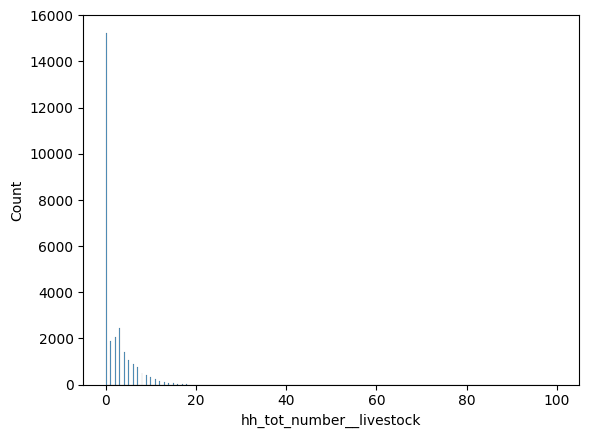

In [54]:
sns.histplot(df, x="hh_tot_number__livestock")

In [55]:
df['hh_tot_number__livestock'].unique()

array([  0.,   4.,   5.,   1.,   2.,   3.,   7.,   6.,  13.,  10.,  12.,
         9.,  11.,   8.,  14.,  15.,  18.,  16.,  21.,  17.,  50.,  20.,
        19.,  84.,  65.,  36., 100.])

In [56]:
df.describe()

,hh_age,hh_edu_level,hh_plots_number,annual_rainfall,cereal_crop,tuber_crop,legume_crop,vegetable_crop,fruit_crop,oil_seed_crop,stimulant_crop,other_crop,has_livestock,has_poultry,has_fishery,hh_tot_number__livestock,hh_tot_number__poultry
count,27681.0,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000,27681.000000
mean,1.0,4.654275,2.598389,1246.223402,0.891333,0.537553,0.477909,0.482353,0.307901,0.623532,0.069506,0.369748,0.449008,0.369062,0.051841,1.984972,0.681334
std,0.0,0.875638,1.510516,548.888456,0.311226,0.498597,0.499521,0.499697,0.461634,0.484508,0.254317,0.482745,0.497402,0.482559,0.221709,3.185701,1.213246
min,1.0,1.000000,1.000000,314.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,5.000000,2.000000,858.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,5.000000,2.000000,1210.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,5.000000,3.000000,1383.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000
max,1.0,6.000000,15.000000,2625.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,41.000000


In [57]:
# Compute the 99th percentile
livestock_cap = df['hh_tot_number__livestock'].quantile(0.99)

# Clip the values safely using .loc
df.loc[:, 'hh_tot_number__livestock'] = df['hh_tot_number__livestock'].clip(upper=livestock_cap)

In [58]:
df['hh_tot_number__livestock'].describe()

count    27681.000000
mean         1.958130
std          2.971727
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         13.000000
Name: hh_tot_number__livestock, dtype: float64

In [59]:
# Compute the 99th percentile
poultry_cap = df['hh_tot_number__poultry'].quantile(0.99)

# Clip the values safely using .loc
df.loc[:, 'hh_tot_number__poultry'] = df['hh_tot_number__poultry'].clip(upper=poultry_cap)

In [60]:
df['hh_tot_number__poultry'].describe()

count    27681.000000
mean         0.656082
std          1.010242
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: hh_tot_number__poultry, dtype: float64

<Axes: xlabel='hh_tot_number__livestock', ylabel='Count'>

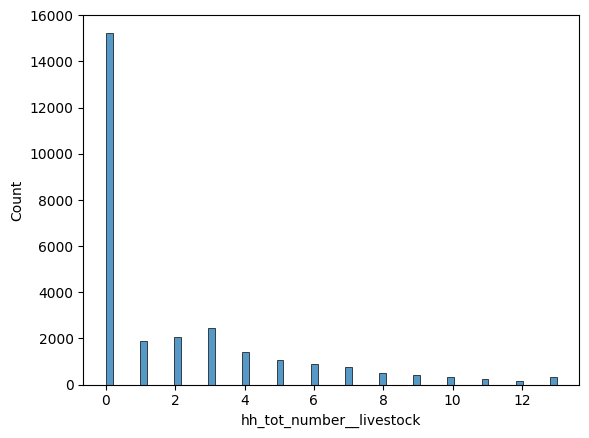

In [61]:
sns.histplot(df, x="hh_tot_number__livestock")

In [62]:
plots_cap = df['hh_plots_number'].quantile(0.99)
df.loc[:, 'hh_plots_number'] = df['hh_plots_number'].clip(upper=plots_cap)

In [63]:
# Fix inconsistencies
df.loc[(df['hh_ag_activity__Livestock'] == 1) & (df['has_livestock'] == 0), 'has_livestock'] = 1
df.loc[(df['has_livestock'] == 1) & (df['hh_tot_number__livestock'] == 0), 'hh_tot_number__livestock'] = 1
df.loc[(df['hh_ag_activity__Poultry'] == 1) & (df['has_poultry'] == 0), 'has_poultry'] = 1
df.loc[(df['has_poultry'] == 1) & (df['hh_tot_number__poultry'] == 0), 'hh_tot_number__poultry'] = 1
df.loc[(df['hh_ag_activity__Fisheries'] == 1) & (df['has_fishery'] == 0), 'has_fishery'] = 1

In [64]:
crop_cols = ['cereal_crop', 'tuber_crop', 'legume_crop', 'vegetable_crop', 'fruit_crop', 'oil_seed_crop', 'stimulant_crop', 'other_crop']
df['crop_sum'] = df[crop_cols].sum(axis=1)
df.loc[(df['hh_ag_activity__Crop'] == 1) & (df['crop_sum'] == 0), crop_cols[0]] = 1  # Default to cereal_crop
df = df.drop(columns=['crop_sum','hh_age'])

C:\Users\HP\AppData\Local\Temp\ipykernel_23048\1624422862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crop_sum'] = df[crop_cols].sum(axis=1)


In [65]:
df.columns

Index(['zone_id', 'sector', 'hh_sex', 'hh_school_attd', 'hh_edu_level',
       'hh_trg', 'hh_ag_activity__Crop', 'hh_ag_activity__Livestock',
       'hh_ag_activity__Poultry', 'hh_ag_activity__Fisheries',
       'hh_plots_number', 'agri_estab', 'non_agri_estab', 'statename',
       'annual_rainfall', 'cereal_crop', 'tuber_crop', 'legume_crop',
       'vegetable_crop', 'fruit_crop', 'oil_seed_crop', 'stimulant_crop',
       'other_crop', 'has_livestock', 'has_poultry', 'has_fishery',
       'hh_tot_number__livestock', 'hh_tot_number__poultry'],
      dtype='object')

In [67]:
df.head()

,zone_id,sector,hh_sex,hh_school_attd,hh_edu_level,hh_trg,hh_ag_activity__Crop,hh_ag_activity__Livestock,hh_ag_activity__Poultry,hh_ag_activity__Fisheries,hh_plots_number,agri_estab,non_agri_estab,statename,annual_rainfall,cereal_crop,tuber_crop,legume_crop,vegetable_crop,fruit_crop,oil_seed_crop,stimulant_crop,other_crop,has_livestock,has_poultry,has_fishery,hh_tot_number__livestock,hh_tot_number__poultry
HHID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0151062,4.0,1.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,abia,2439,1,1,0,1,1,0,0,0,1,1,1,1.0,1.0
0384700,4.0,1.0,2.0,1.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,abia,2439,1,0,0,1,1,0,0,0,1,1,1,1.0,2.0
0433113,4.0,1.0,2.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,abia,2439,1,0,0,0,0,0,0,0,1,1,1,1.0,1.0
0996908,4.0,1.0,1.0,1.0,5.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,abia,2439,1,1,0,1,1,1,0,0,1,1,1,1.0,1.0
0029719,4.0,1.0,1.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,abia,2439,1,1,0,1,1,0,0,0,1,1,1,1.0,1.0


## I stopped here

In [39]:
df['is_high_potential_farmer'].unique()

array([0, 1])

In [40]:
 df.sample(20)

,HHID,state_code,lga_code,ea_code,zone_id,sector,hh_sex,hh_age,hh_school_attd,hh_trg,hh_ag_activity__Crop,hh_ag_activity__Livestock,hh_ag_activity__Poultry,hh_ag_activity__Fisheries,hh_plots_number,agri_estab,cereal_crop,tuber_crop,legume_crop,vegetable_crop,fruit_crop,oil_seed_crop,stimulant_crop,other_crop,has_livestock,has_poultry,has_fishery,hh_tot_number__livestock,hh_tot_number__poultry,num_crop_groups,is_high_potential_farmer
741138,0741879,37.0,754.0,0008504,6.0,1.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,2.0,1,1,1,1,1,1,1,1,0,0,0,0.0,0.0,8,0
798915,0712411,22.0,449.0,0189200,6.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1,1,0,1,1,1,1,1,1,1,0,1.0,2.0,7,1
618147,1000997,19.0,393.0,0213300,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1,1,1,0,1,0,0,0,0,1,0,0.0,4.0,4,0
994,0801401,31.0,641.0,0007302,4.0,1.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1,1,0,1,1,0,0,0,0,0,0,0.0,0.0,4,0
998035,0547176,2.0,30.0,0026901,3.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,1,0,0,1,1,0,0,0,1,0,0,3.0,0.0,3,0
571913,0635536,3.0,43.0,0213300,3.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1,0,1,0,0,1,0,0,1,0,0,2.0,0.0,3,0
311204,0008490,25.0,520.0,0013704,5.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,2,0
574492,0665002,3.0,51.0,0003001,3.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,7.0,2.0,1,0,1,0,0,1,0,0,1,0,0,6.0,0.0,3,0
6558,0833361,31.0,637.0,0050504,4.0,1.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,5.0,1.0,1,1,0,1,1,1,1,1,1,1,0,1.0,2.0,7,1
246131,0022006,29.0,579.0,0003302,5.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,1,1,0,1,1,1,0,1,1,1,1,3.0,2.0,6,1


In [41]:
df['is_high_potential_farmer'].value_counts(normalize=True)


is_high_potential_farmer
0    0.842445
1    0.157555
Name: proportion, dtype: float64

In [42]:
# Convert all float columns to int if there are no NaNs and values are whole numbers
for col in df.select_dtypes(include='float'):
    if df[col].isna().sum() == 0 and (df[col] % 1 == 0).all():
        df[col] = df[col].astype(int)


In [43]:
df.columns = df.columns.str.lower()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418636 entries, 11 to 1002378
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   hhid                       418636 non-null  object
 1   state_code                 418636 non-null  int64 
 2   lga_code                   418636 non-null  int64 
 3   ea_code                    418636 non-null  object
 4   zone_id                    418636 non-null  int64 
 5   sector                     418636 non-null  int64 
 6   hh_sex                     418636 non-null  int64 
 7   hh_age                     418636 non-null  int64 
 8   hh_school_attd             418636 non-null  int64 
 9   hh_trg                     418636 non-null  int64 
 10  hh_ag_activity__crop       418636 non-null  int64 
 11  hh_ag_activity__livestock  418636 non-null  int64 
 12  hh_ag_activity__poultry    418636 non-null  int64 
 13  hh_ag_activity__fisheries  418636 non-null  int

In [45]:
df = df.drop(columns=['state_code', 'lga_code', 'ea_code', 'zone_id'])

In [46]:
df = df.set_index("hhid")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418636 entries, 0254335 to 0740266
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   sector                     418636 non-null  int64
 1   hh_sex                     418636 non-null  int64
 2   hh_age                     418636 non-null  int64
 3   hh_school_attd             418636 non-null  int64
 4   hh_trg                     418636 non-null  int64
 5   hh_ag_activity__crop       418636 non-null  int64
 6   hh_ag_activity__livestock  418636 non-null  int64
 7   hh_ag_activity__poultry    418636 non-null  int64
 8   hh_ag_activity__fisheries  418636 non-null  int64
 9   hh_plots_number            418636 non-null  int64
 10  agri_estab                 418636 non-null  int64
 11  cereal_crop                418636 non-null  int64
 12  tuber_crop                 418636 non-null  int64
 13  legume_crop                418636 non-null  int64
 14  ve

In [48]:
df.rename(columns={
    "sector": "Sector",
    "hh_sex": "Household Head Sex",
    "hh_age": "Household Head Age Group",
    "hh_school_attd": "Household Head School Attendance",
    "hh_trg": "Household Head Training Participation",
    "hh_ag_activity__crop": "Engaged in Crop Farming",
    "hh_ag_activity__livestock": "Engaged in Livestock Farming",
    "hh_ag_activity__poultry": "Engaged in Poultry Farming",
    "hh_ag_activity__fisheries": "Engaged in Fisheries/Aquaculture",
    "hh_plots_number": "Number of Cultivated Plots",
    "agri_estab": "Has Agricultural Establishment",
    "cereal_crop": "Grows Any Cereal Crop",
    "tuber_crop": "Grows Any Tuber Crop",
    "legume_crop": "Grows Any Legume Crop",
    "vegetable_crop": "Grows Any Vegetable Crop",
    "fruit_crop": "Grows Any Fruit/Nut Crop",
    "oil_seed_crop": "Grows Any Oil Seed Crop",
    "stimulant_crop": "Grows Any Stimulant Crop",
    "other_crop": "Grows Other Crops",
    "has_livestock": "Owns Livestock",
    "has_poultry": "Owns Poultry",
    "has_fishery": "Engaged in Fishery",
    "hh_tot_number__livestock": "Total Livestock Count",
    "hh_tot_number__poultry": "Total Poultry Count",
    "num_crop_groups": "Number of Crop Categories Cultivated",
    "is_high_potential_farmer": "High Potential Farmer"
}, inplace=True)


In [49]:
df.head()

,Sector,Household Head Sex,Household Head Age Group,Household Head School Attendance,Household Head Training Participation,Engaged in Crop Farming,Engaged in Livestock Farming,Engaged in Poultry Farming,Engaged in Fisheries/Aquaculture,Number of Cultivated Plots,Has Agricultural Establishment,Grows Any Cereal Crop,Grows Any Tuber Crop,Grows Any Legume Crop,Grows Any Vegetable Crop,Grows Any Fruit/Nut Crop,Grows Any Oil Seed Crop,Grows Any Stimulant Crop,Grows Other Crops,Owns Livestock,Owns Poultry,Engaged in Fishery,Total Livestock Count,Total Poultry Count,Number of Crop Categories Cultivated,High Potential Farmer
hhid,,,,,,,,,,,,,,,,,,,,,,,,,,
0254335,1,1,3,1,2,2,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,4,0
0768954,1,2,3,2,2,2,1,1,1,2,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,0
0943550,1,2,2,2,2,2,1,1,1,1,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,0
0258293,1,1,3,1,2,2,1,1,1,3,2,1,1,0,1,1,1,0,0,0,0,0,0,0,5,0
0380933,1,1,3,1,2,2,1,1,1,1,2,1,1,0,1,0,1,0,0,0,0,0,0,0,4,0


In [50]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate income_bracket
# Let's assume: 60% low, 30% medium, 10% high
df['income_bracket'] = np.random.choice(
    ['low', 'medium', 'high'],
    size=len(df),
    p=[0.6, 0.3, 0.1]
)

# Simulate cooperative membership (Yes=1, No=0)
# Assume 40% of farmers belong to a cooperative
df['cooperative_member'] = np.random.choice([1, 0], size=len(df), p=[0.4, 0.6])

# Simulate previous loan (Yes=1, No=0)
# Assume 25% of farmers had a previous loan
df['previous_loan'] = np.random.choice([1, 0], size=len(df), p=[0.25, 0.75])

# Simulate loan repayment status (only for those who had a previous loan)
# 80% repayment success rate
df['loan_repaid'] = 0  # default to 0
df.loc[df['previous_loan'] == 1, 'loan_repaid'] = np.random.choice(
    [1, 0], size=df['previous_loan'].sum(), p=[0.8, 0.2]
)

# Optional: encode income bracket numerically for modeling
df['income_level'] = df['income_bracket'].map({'low': 1, 'medium': 2, 'high': 3})

In [51]:
df.head()

,Sector,Household Head Sex,Household Head Age Group,Household Head School Attendance,Household Head Training Participation,Engaged in Crop Farming,Engaged in Livestock Farming,Engaged in Poultry Farming,Engaged in Fisheries/Aquaculture,Number of Cultivated Plots,Has Agricultural Establishment,Grows Any Cereal Crop,Grows Any Tuber Crop,Grows Any Legume Crop,Grows Any Vegetable Crop,Grows Any Fruit/Nut Crop,Grows Any Oil Seed Crop,Grows Any Stimulant Crop,Grows Other Crops,Owns Livestock,Owns Poultry,Engaged in Fishery,Total Livestock Count,Total Poultry Count,Number of Crop Categories Cultivated,High Potential Farmer,income_bracket,cooperative_member,previous_loan,loan_repaid,income_level
hhid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0254335,1,1,3,1,2,2,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,4,0,low,1,0,0,1
0768954,1,2,3,2,2,2,1,1,1,2,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,0,high,0,1,1,3
0943550,1,2,2,2,2,2,1,1,1,1,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,0,medium,0,1,0,2
0258293,1,1,3,1,2,2,1,1,1,3,2,1,1,0,1,1,1,0,0,0,0,0,0,0,5,0,low,0,0,0,1
0380933,1,1,3,1,2,2,1,1,1,1,2,1,1,0,1,0,1,0,0,0,0,0,0,0,4,0,low,0,0,0,1


In [52]:
df.columns

Index(['Sector', 'Household Head Sex', 'Household Head Age Group',
       'Household Head School Attendance',
       'Household Head Training Participation', 'Engaged in Crop Farming',
       'Engaged in Livestock Farming', 'Engaged in Poultry Farming',
       'Engaged in Fisheries/Aquaculture', 'Number of Cultivated Plots',
       'Has Agricultural Establishment', 'Grows Any Cereal Crop',
       'Grows Any Tuber Crop', 'Grows Any Legume Crop',
       'Grows Any Vegetable Crop', 'Grows Any Fruit/Nut Crop',
       'Grows Any Oil Seed Crop', 'Grows Any Stimulant Crop',
       'Grows Other Crops', 'Owns Livestock', 'Owns Poultry',
       'Engaged in Fishery', 'Total Livestock Count', 'Total Poultry Count',
       'Number of Crop Categories Cultivated', 'High Potential Farmer',
       'income_bracket', 'cooperative_member', 'previous_loan', 'loan_repaid',
       'income_level'],
      dtype='object')

In [53]:
df = df.drop(columns=['High Potential Farmer'])

In [54]:
import numpy as np

# Define binary scoring conditions using the updated column names
conditions = [
    (df['Number of Crop Categories Cultivated'] >= 4).astype(int),  # diverse crops
    ((df['Owns Livestock'] | df['Owns Poultry'] | df['Engaged in Fishery'])).astype(int),  # has animals
    (df['cooperative_member'] == 1).astype(int),  # cooperative member
    (df['income_level'] >= 2).astype(int),  # medium or high income
    ((df['previous_loan'] == 0) | (df['loan_repaid'] == 1)).astype(int)  # repaid or never borrowed
]

# Sum the binary scores
df['High Potential Score'] = np.column_stack(conditions).sum(axis=1)

# Flag as high potential farmer if they meet at least 3 criteria
df['High Potential Farmer'] = (df['High Potential Score'] >= 3).astype(int)

# Optionally drop score column
df.drop(columns='High Potential Score', inplace=True)


In [55]:
df.head()

,Sector,Household Head Sex,Household Head Age Group,Household Head School Attendance,Household Head Training Participation,Engaged in Crop Farming,Engaged in Livestock Farming,Engaged in Poultry Farming,Engaged in Fisheries/Aquaculture,Number of Cultivated Plots,Has Agricultural Establishment,Grows Any Cereal Crop,Grows Any Tuber Crop,Grows Any Legume Crop,Grows Any Vegetable Crop,Grows Any Fruit/Nut Crop,Grows Any Oil Seed Crop,Grows Any Stimulant Crop,Grows Other Crops,Owns Livestock,Owns Poultry,Engaged in Fishery,Total Livestock Count,Total Poultry Count,Number of Crop Categories Cultivated,income_bracket,cooperative_member,previous_loan,loan_repaid,income_level,High Potential Farmer
hhid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0254335,1,1,3,1,2,2,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,4,low,1,0,0,1,1
0768954,1,2,3,2,2,2,1,1,1,2,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,high,0,1,1,3,0
0943550,1,2,2,2,2,2,1,1,1,1,2,1,1,0,1,0,0,0,0,0,0,0,0,0,3,medium,0,1,0,2,0
0258293,1,1,3,1,2,2,1,1,1,3,2,1,1,0,1,1,1,0,0,0,0,0,0,0,5,low,0,0,0,1,0
0380933,1,1,3,1,2,2,1,1,1,1,2,1,1,0,1,0,1,0,0,0,0,0,0,0,4,low,0,0,0,1,0


In [56]:
df['High Potential Farmer'].value_counts(normalize=True)

High Potential Farmer
1    0.664432
0    0.335568
Name: proportion, dtype: float64

In [57]:
df.to_csv("farmer_df.csv", index= False)

In [59]:

df_encoded = df.copy()
label_cols = ['income_bracket']  # you can add more if needed

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [60]:
target = 'High Potential Farmer'
X = df_encoded.drop(columns= target)
y = df_encoded[target]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [63]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[[28077    19]
 [    0 55632]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28096
           1       1.00      1.00      1.00     55632

    accuracy                           1.00     83728
   macro avg       1.00      1.00      1.00     83728
weighted avg       1.00      1.00      1.00     83728

ROC-AUC Score: 0.9999999916828567


In [64]:
leakage_cols = [
    'Number of Crop Categories Cultivated',
    'Owns Livestock',
    'Owns Poultry',
    'Engaged in Fishery',
    'cooperative_member',
    'income_level',
    'previous_loan',
    'loan_repaid'
]

X_train_filtered = X_train.drop(columns=leakage_cols)
X_test_filtered = X_test.drop(columns=leakage_cols)

rf_model.fit(X_train_filtered, y_train)
y_pred = rf_model.predict(X_test_filtered)


In [65]:
y_proba = rf_model.predict_proba(X_test_filtered)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[[24484  3612]
 [ 9815 45817]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78     28096
           1       0.93      0.82      0.87     55632

    accuracy                           0.84     83728
   macro avg       0.82      0.85      0.83     83728
weighted avg       0.86      0.84      0.84     83728

ROC-AUC Score: 0.9118703508576413


In [67]:
# Initialize model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # Handle imbalance
)

# Fit model
xgb_model.fit(X_train_filtered, y_train)

# Predict
y_pred = xgb_model.predict(X_test_filtered)
y_proba = xgb_model.predict_proba(X_test_filtered)[:, 1]

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[[26966  1130]
 [11059 44573]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.82     28096
           1       0.98      0.80      0.88     55632

    accuracy                           0.85     83728
   macro avg       0.84      0.88      0.85     83728
weighted avg       0.89      0.85      0.86     83728

ROC-AUC Score: 0.9186681747285326


<Figure size 1000x800 with 0 Axes>

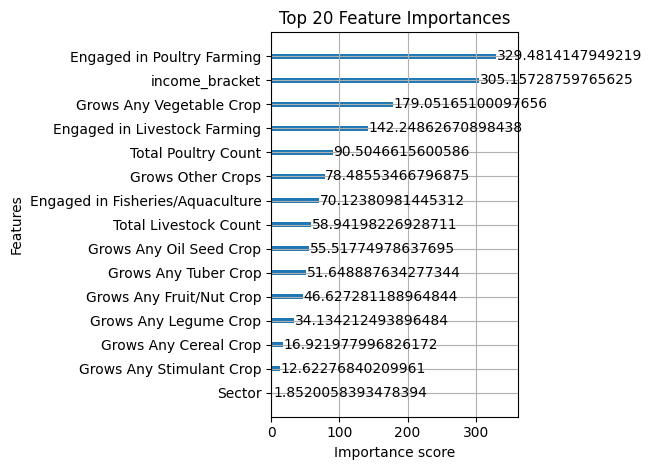

In [68]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=15, importance_type='gain', title='Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [69]:
import joblib

# Save the trained model to a file
joblib.dump(xgb_model, 'xgb_credit_scoring_model.pkl')

['xgb_credit_scoring_model.pkl']

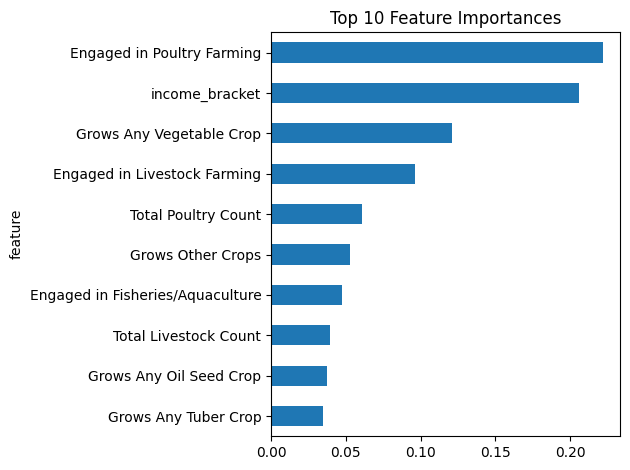

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    'feature': X_train_filtered.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df.head(10)  # Inspect top features

# Plot
importance_df.head(10).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [71]:
importance_df.head(10)

,feature,importance
7,Engaged in Poultry Farming,0.222174
21,income_bracket,0.205772
14,Grows Any Vegetable Crop,0.120737
6,Engaged in Livestock Farming,0.095920
20,Total Poultry Count,0.061029
18,Grows Other Crops,0.052924
8,Engaged in Fisheries/Aquaculture,0.047286
19,Total Livestock Count,0.039745
16,Grows Any Oil Seed Crop,0.037436
12,Grows Any Tuber Crop,0.034828


In [72]:
# Define selected features
selected_features = [
    'Engaged in Poultry Farming',
    'income_bracket',
    'Grows Any Vegetable Crop',
    'Engaged in Livestock Farming',
    'Total Poultry Count',
    'Grows Other Crops',
    'Engaged in Fisheries/Aquaculture',
    'Total Livestock Count',
    'Grows Any Oil Seed Crop',
    'Grows Any Tuber Crop'
]

X = df_encoded[selected_features]
y = df_encoded['High Potential Farmer']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle class imbalance
scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train XGBoost
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_weight,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


[[25659  2437]
 [10588 45044]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80     28096
           1       0.95      0.81      0.87     55632

    accuracy                           0.84     83728
   macro avg       0.83      0.86      0.84     83728
weighted avg       0.87      0.84      0.85     83728

ROC-AUC Score: 0.9151665294389203


In [74]:
# Save the trained model to a file
joblib.dump(model, 'xgb_credit_scoring_model.pkl')

['xgb_credit_scoring_model.pkl']